In [1]:
import linear
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Датасет

In [2]:
weather_ds = pd.read_csv('datasets/weatherHistory.csv')

In [3]:
weather_ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
target = weather_ds['Temperature (C)']
weather_ds = weather_ds[['Precip Type', 'Humidity', 'Pressure (millibars)', 'Temperature (C)']]
weather_ds

,Precip Type,Humidity,Pressure (millibars),Temperature (C)
0,rain,0.89,1015.13,9.472222
1,rain,0.86,1015.63,9.355556
2,rain,0.89,1015.94,9.377778
3,rain,0.83,1016.41,8.288889
4,rain,0.83,1016.51,8.755556
...,...,...,...,...
96448,rain,0.43,1014.36,26.016667
96449,rain,0.48,1015.16,24.583333
96450,rain,0.56,1015.66,22.038889
96451,rain,0.60,1015.95,21.522222


In [5]:
weather_ds = pd.get_dummies(weather_ds, prefix='precip', columns=['Precip Type'])
weather_ds

,Humidity,Pressure (millibars),Temperature (C),precip_rain,precip_snow
0,0.89,1015.13,9.472222,1,0
1,0.86,1015.63,9.355556,1,0
2,0.89,1015.94,9.377778,1,0
3,0.83,1016.41,8.288889,1,0
4,0.83,1016.51,8.755556,1,0
...,...,...,...,...,...
96448,0.43,1014.36,26.016667,1,0
96449,0.48,1015.16,24.583333,1,0
96450,0.56,1015.66,22.038889,1,0
96451,0.60,1015.95,21.522222,1,0


In [6]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Аналитическое решение

In [8]:
an_solution = linear.AnalyticalSolution()
an_solution.fit(X_train, y_train)
y_ = an_solution.predict(X_test)

In [9]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 37.92853963214437
MAE = 5.096477223237314


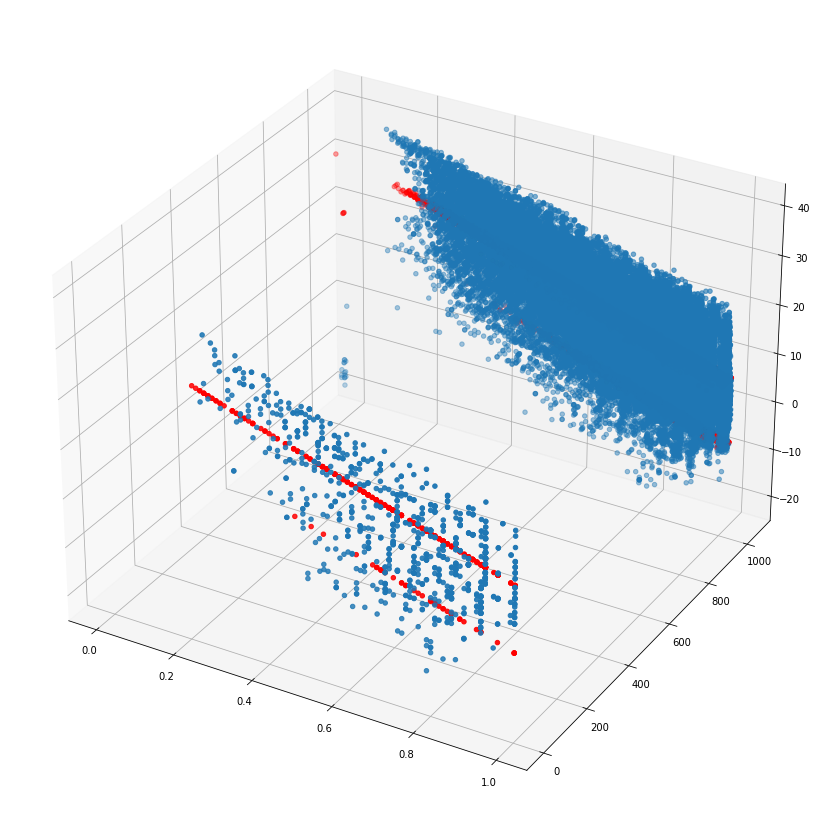

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Видно, что предсказания (красные точки) лежат в правильных "облаках".

# Градиентный спуск

Из-за фичи Pressure градиентный спуск расходился, регуляризация не помогла. Поэтому был дописан метод наискорейшнего спуска - когда мы выбираем оптимальный шаг alpha.
   

In [11]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, tolerance=1, descent_method='normalization const', 
                                   reg_lmb=100, regularization='L2', loss=MSE)
gd.fit(X_train, y_train)

In [12]:
y_ = gd.predict(X_test)

In [13]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 92.37161828028275
MAE = 7.943778978266408


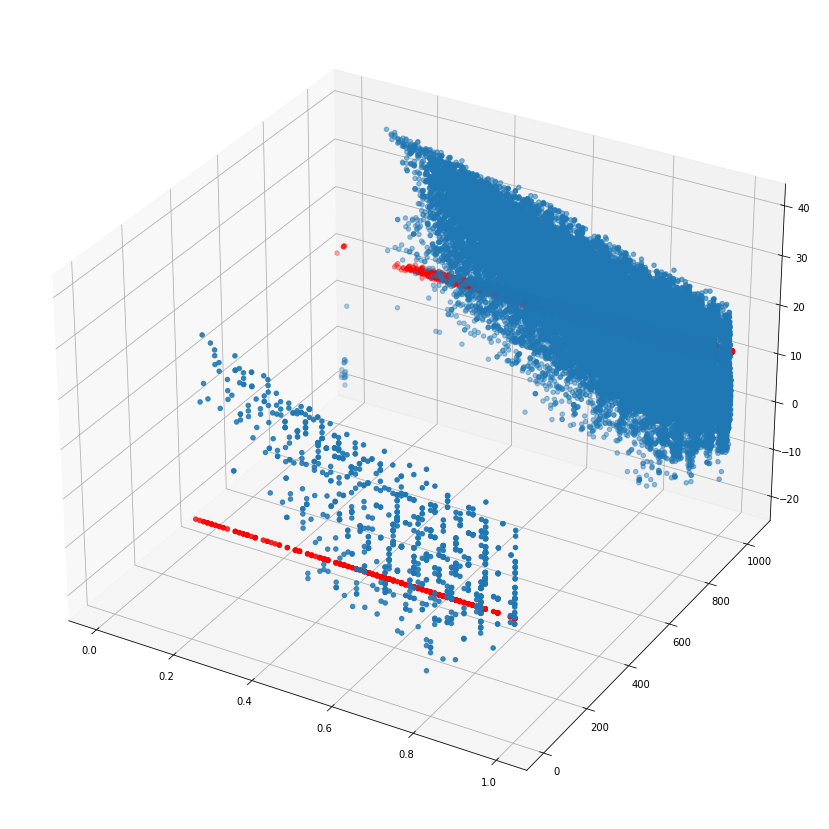

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Метод показал себя гораздо хуже аналитического решения, однако если убрать фичу Pressure то градиентный спуск все же сходится к оптимуму 

In [15]:
X = weather_ds.drop(columns=['Temperature (C)', 'Pressure (millibars)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600)
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 38.60195893432198
MAE = 5.147276577724794


Попробуем отнормировать саму фичу

In [16]:
from data import normalize_columns
weather_ds = weather_ds.rename(columns={'Pressure (millibars)': 'Pressure'})
normalize_columns(weather_ds, columns=['Pressure'])

MSE = 38.45026881897556
MAE = 5.133109238885937


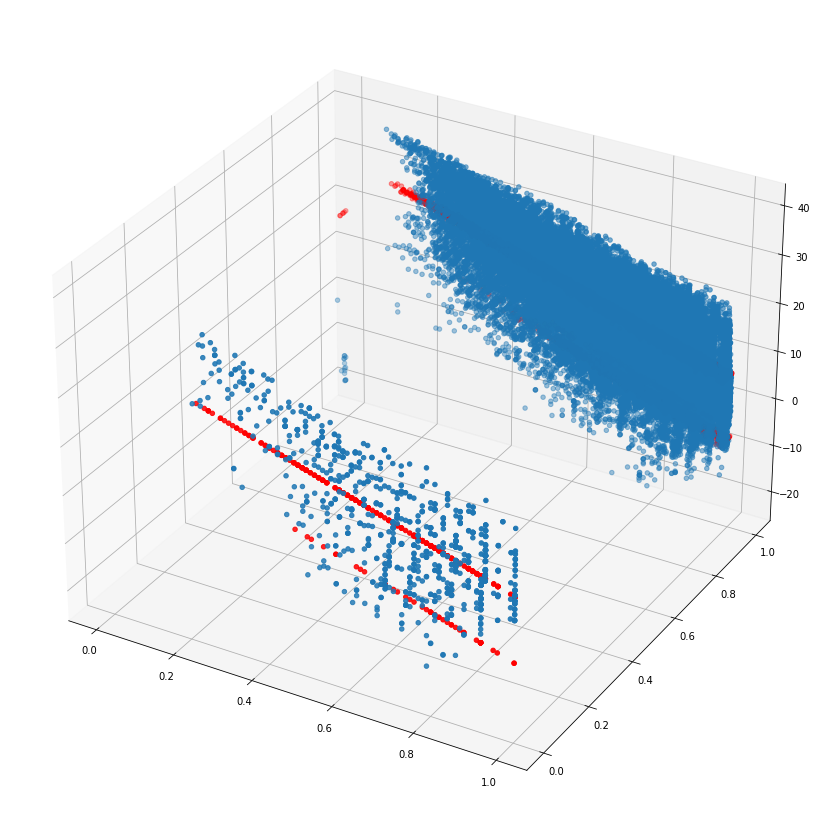

In [17]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600, 
                                   loss = MSE, descent_method='normalization const')
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_, c='red')

Нормировка фичи помогла!!! УРААА

# Stohastic Gradient Descend

MSE = 38.78654113775488
MAE = 5.160067769112117


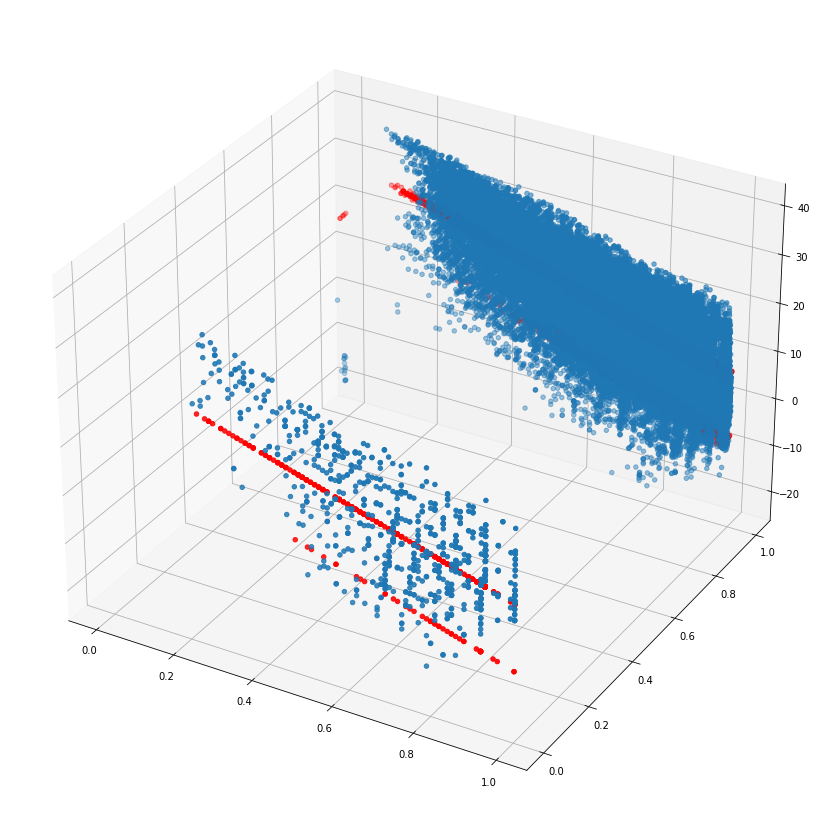

In [18]:
from linear import StochasticGradientDescent
sgd = StochasticGradientDescent(alpha=0.01, eras=5, batch_size=50, tolerance=1, loss=MSE, 
                               descent_method='const')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(f'MSE = {MSE.get_loss(y_test, y_pred)}\nMAE = {MAE.get_loss(y_test, y_pred)}')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_pred, c='red')

# Логистическая регрессия

In [19]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df = iris_df.reset_index()
iris_df = iris_df.drop(columns=['Id', 'index'])
iris_df = iris_df.astype({'Species': 'category'})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris_df['Species'].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

In [21]:
iris_df['is_setosa']= (iris_df['Species'] == 'Iris-setosa').astype(int)
iris_df = iris_df.drop(columns='Species')
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,is_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [22]:
X = iris_df.drop(columns='is_setosa')
y = iris_df['is_setosa']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Оба написанных класса показывают отличный результат классификации:

In [24]:
from linear import StandardGradientDescent
from quality_functional import LogisticLoss
gd = StandardGradientDescent(alpha = 0.1, S = 100, loss=LogisticLoss)
gd.fit(X_train, y_train.to_numpy())

In [25]:
y_proba = gd.predict(X_test)

In [26]:
(y_proba > 0.5) == (y_test == 1)

18     True
99     True
112    True
63     True
78     True
68     True
45     True
5      True
123    True
29     True
85     True
3      True
0      True
111    True
50     True
74     True
105    True
120    True
51     True
21     True
125    True
66     True
145    True
82     True
46     True
34     True
79     True
73     True
39     True
96     True
114    True
119    True
12     True
95     True
64     True
83     True
129    True
127    True
Name: is_setosa, dtype: bool

In [27]:
sgd = StochasticGradientDescent(alpha=0.01, eras=10, tolerance = 1, batch_size=30, loss=LogisticLoss)
sgd.fit(X_train, y_train)
y_proba = sgd.predict(X_test)

In [28]:
(y_proba > 0.5) == (y_test == 1)

18      True
99     False
112    False
63     False
78     False
68     False
45      True
5       True
123    False
29      True
85     False
3       True
0       True
111    False
50     False
74     False
105    False
120    False
51     False
21      True
125    False
66     False
145    False
82     False
46      True
34      True
79     False
73     False
39      True
96     False
114    False
119    False
12      True
95     False
64     False
83     False
129    False
127    False
Name: is_setosa, dtype: bool

## Многоклассовая классификация

In [29]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df = iris_df.reset_index()
iris_df = iris_df.drop(columns=['Id', 'index'])
iris_df = iris_df.astype({'Species': 'category'})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
gd = linear.StandardGradientDescent(alpha=0.01, S=200, loss=LogisticLoss)
classifier = linear.OneVsAllClassifier(gd)
classifier.fit(X_train, y_train)

In [35]:
y_pred = classifier.predict(X_test)


In [40]:
y_test == y_pred

127    False
46      True
102     True
92      True
68      True
50      True
148     True
115     True
61      True
77      True
141    False
139    False
51      True
22      True
58      True
2       True
24      True
134    False
8       True
29      True
118     True
119    False
36      True
14      True
34      True
19      True
103     True
90      True
106     True
120     True
64      True
142     True
80      True
99      True
11      True
124     True
125    False
132     True
Name: Species, dtype: bool